<a href="https://colab.research.google.com/github/CedricFont/Deep-learning-for-autonomous-vehicle/blob/develop/Final_project/Tests_for_pose_estimation/Pose_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade opencv-python

In [2]:
from google.colab import drive
from google.colab import files
import cv2
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from google.colab.patches import cv2_imshow

In [4]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
! git clone https://github.com/spmallick/learnopencv.git

fatal: destination path 'learnopencv' already exists and is not an empty directory.


In [ ]:
%ls -a
%cd ..
%ls -a
%cd /content/drive/MyDrive/Colab_Notebooks
%ls -a

.file-revisions-by-id/  Shareddrives/             .Trash-0/
MyDrive/                .shortcut-targets-by-id/
/content
./  ../  .config/  drive/  learnopencv/  sample_data/
/content/drive/MyDrive/Colab_Notebooks
11_Panda_robot_identification.ipynb
CNN_pytorch_3_2_10_epochs.ckpt
CNN_pytorch_3_2.ckpt
CNN_pytorch.ckpt
getModels.sh
graph_opt.pb
image.jpg
linearClassifier_pytorch.ckpt
pose_deploy_linevec_faster_4_stages.prototxt
pose_deploy_linevec.prototxt
pose_iter_160000.caffemodel
Softmax.ipynb
softmax_weights.pkl
Untitled0.ipynb
Untitled1.ipynb


In [ ]:
!cp -c "/content/drive/MyDrive/Colab_Notebooks/pose_iter_160000.caffemodel" -P "/pose/mpi"

cp: invalid option -- 'c'
Try 'cp --help' for more information.


In [ ]:
% cd learnopencv/OpenPose
! ls -a

/content/learnopencv/OpenPose
.		.ipynb_checkpoints  OpenPose_Notebook.ipynb  README.md
..		multiple.jpeg	    OpenPoseVideo.cpp	     sample_video.mp4
CMakeLists.txt	OpenPoseImage.cpp   OpenPoseVideo.py	     single.jpeg
getModels.sh	OpenPoseImage.py    pose


In [ ]:
!sudo chmod a+x getModels.sh

In [ ]:
%ls -a
%cd learnopencv/OpenPose

./   .bashrc*  .config/  .ipython/  .keras/  .npm/     .ssh/
../  .cache/   .gsutil/  .jupyter/  .local/  .profile  .tmux.conf*
[Errno 2] No such file or directory: 'learnopencv/OpenPose'
/root


In [6]:
# Specify the paths for the 2 files
protoFile = "/content/drive/MyDrive/Colab_Notebooks/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "/content/drive/MyDrive/Colab_Notebooks/pose_iter_160000.caffemodel"

# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


In [ ]:
%cd /.
%ls -a
%cd /content/learnopencv/OpenPose
%ls -a

/
./     content/     etc/    lib64/  proc/        sbin/               tmp/
../    datalab/     home/   media/  python-apt/  srv/                tools/
bin/   dev/         lib/    mnt/    root/        sys/                usr/
boot/  .dockerenv*  lib32/  opt/    run/         tensorflow-1.15.2/  var/
/content/learnopencv/OpenPose
./              .ipynb_checkpoints/  OpenPose_Notebook.ipynb  README.md
../             multiple.jpeg        OpenPoseVideo.cpp        sample_video.mp4
CMakeLists.txt  OpenPoseImage.cpp    OpenPoseVideo.py         single.jpeg
getModels.sh*   OpenPoseImage.py     pose/


In [ ]:
%ls -a

./              .ipynb_checkpoints/  OpenPose_Notebook.ipynb  README.md
../             multiple.jpeg        OpenPoseVideo.cpp        sample_video.mp4
CMakeLists.txt  OpenPoseImage.cpp    OpenPoseVideo.py         single.jpeg
getModels.sh*   OpenPoseImage.py     pose/


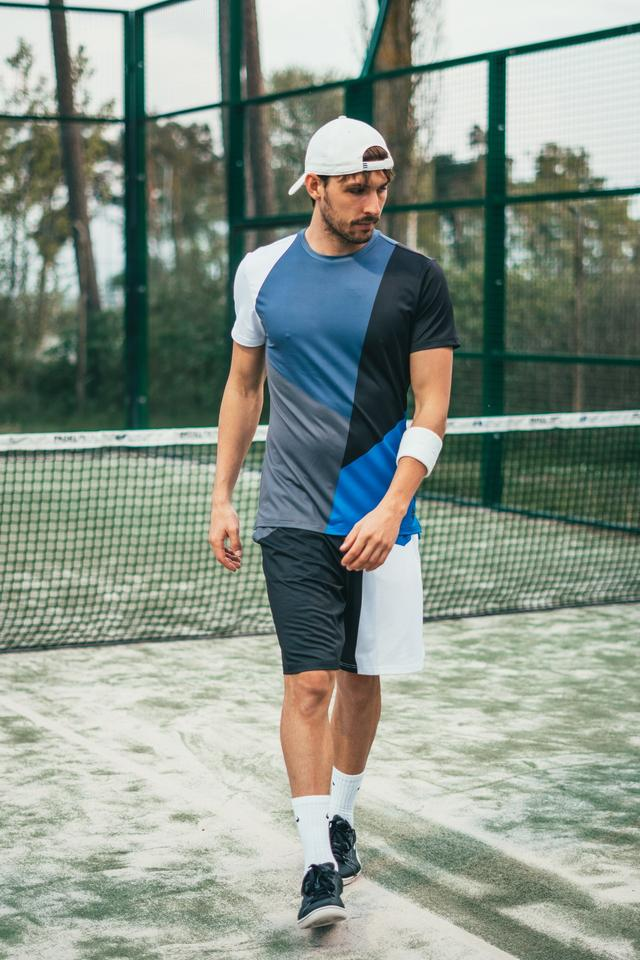

In [ ]:
# Read image
frame = cv2.imread("/content/learnopencv/OpenPose/single.jpeg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1
display(Image(filename='/content/learnopencv/OpenPose/single.jpeg')) 

# Specify the input image dimensions
inWidth = 368
inHeight = 368

# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
net.setInput(inpBlob)


In [ ]:
output = net.forward()

In [7]:
MODE = 'MPI'

if MODE is "COCO":
    protoFile = "pose/coco/pose_deploy_linevec.prototxt"
    weightsFile = "pose/coco/pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17] ]

elif MODE is "MPI" :
    protoFile = "/content/drive/MyDrive/Colab_Notebooks/pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = "/content/drive/MyDrive/Colab_Notebooks/pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

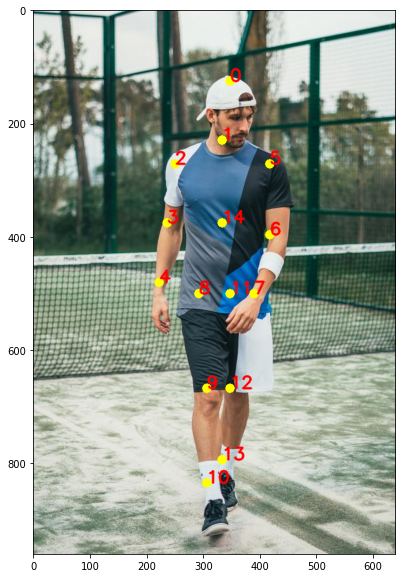

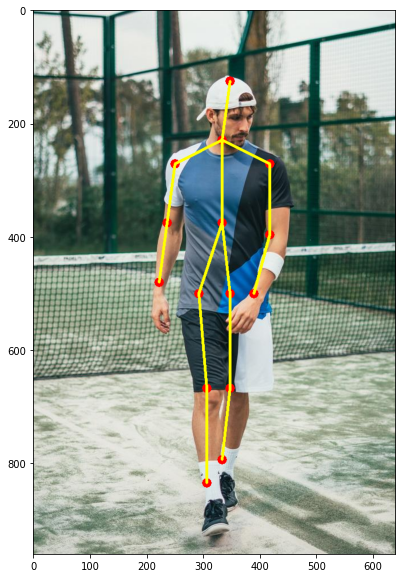

In [ ]:
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [22]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # save image
  # cv2.imwrite(filename, img)

  return img

def preProcessImage(img):

  # Read image
  # frame = cv2.imread(img)
  frame = img

  # Specify the input image dimensions
  inWidth = 368
  inHeight = 368

  # Prepare the frame to be fed to the network
  inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

  return inpBlob

def createNet(img):

  # Read the network into Memory
  net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

  # Set the prepared object as the input blob of the network
  net.setInput(inpBlob)

  # Pass through pre-trained net
  output = net.forward()

  return output

def denoteLimbs(output, img):

  frame = img
  frameCopy = np.copy(img)
  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  threshold = 0.1

  # Specify the input image dimensions
  H = output.shape[2]
  W = output.shape[3]

  # Empty list to store the detected keypoints
  points = []

  for i in range(nPoints):
      # confidence map of corresponding body's part.
      probMap = output[0, i, :, :]

      # Find global maxima of the probMap.
      minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
      
      # Scale the point to fit on the original image
      x = (frameWidth * point[0]) / W
      y = (frameHeight * point[1]) / H

      if prob > threshold : 
          cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
          cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
          cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

          # Add the point to the list if the probability is greater than the threshold
          points.append((int(x), int(y)))
      else :
          points.append(None)

  # Draw Skeleton
  for pair in POSE_PAIRS:
      partA = pair[0]
      partB = pair[1]

      if points[partA] and points[partB]:
          cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

  plt.figure(figsize=[10,10])
  plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
  plt.figure(figsize=[10,10])
  plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


<IPython.core.display.Javascript object>

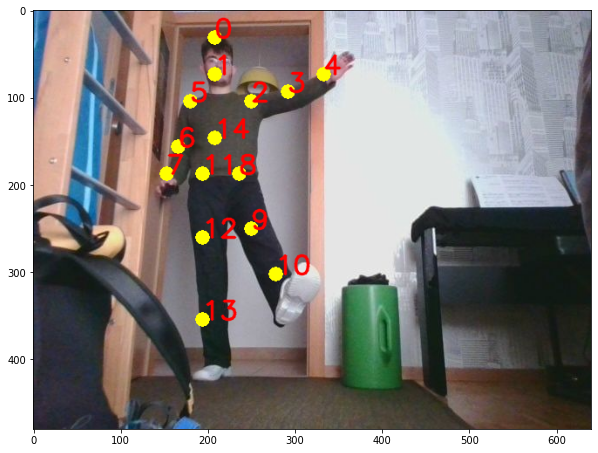

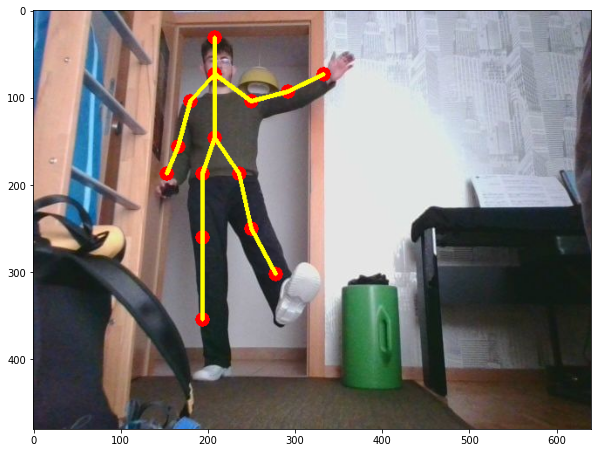

In [25]:
try:
  inputImg = take_photo('photo.jpg')
  inpBlob = preProcessImage(inputImg)
  outputImg = createNet(inpBlob)
  denoteLimbs(outputImg, inputImg)
  # print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  # display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [21]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

def preProcessImage(img):

  # Read image
  # frame = cv2.imread(img)
  frame = img

  # Specify the input image dimensions
  inWidth = 100
  inHeight = 100

  # Prepare the frame to be fed to the network
  inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

  return inpBlob

def createNet(img):

  # Read the network into Memory
  net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
  net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
  net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

  # Set the prepared object as the input blob of the network
  net.setInput(img)

  time1 = time.time()
  # Pass through pre-trained net
  output = net.forward()
  # print('Elapsed time : %.4f'%(time.time()-time1))

  return output

def denoteLimbs(output, img):

  frame = img
  frameCopy = np.copy(img)
  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  threshold = 0.5

  # Specify the input image dimensions
  H = output.shape[2]
  W = output.shape[3]

  # Empty list to store the detected keypoints
  points = []

  for i in range(nPoints):
      # confidence map of corresponding body's part.
      probMap = output[0, i, :, :]

      # Find global maxima of the probMap.
      minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
      
      # Scale the point to fit on the original image
      x = (frameWidth * point[0]) / W
      y = (frameHeight * point[1]) / H

      if prob > threshold : 
          cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
          cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
          cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

          # Add the point to the list if the probability is greater than the threshold
          points.append((int(x), int(y)))
      else :
          points.append(None)

  # Draw Skeleton
  for pair in POSE_PAIRS:
      partA = pair[0]
      partB = pair[1]

      if points[partA] and points[partB]:
          cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

  return frame

  # plt.figure(figsize=[10,10])
  # plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
  # plt.figure(figsize=[10,10])
  # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    inputImg = js_to_image(js_reply["img"])
    inpBlob = preProcessImage(inputImg)
    outputImg = createNet(inpBlob)
    annotatedImg = denoteLimbs(outputImg, inputImg)

    cv2_imshow(annotatedImg)

    # create transparent overlay for bounding box
    # bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # # grayscale image for face detection
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # # get face region coordinates
    # faces = face_cascade.detectMultiScale(gray)
    # # get face bounding box for overlay
    # for (x,y,w,h) in faces:
    #   bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    # bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # # convert overlay of bbox into bytes
    # bbox_bytes = bbox_to_bytes(bbox_array)
    # # update bbox so next frame gets new overlay
    # bbox = bbox_bytes